# Assignment 2

## 2-layer perceptron for XOR problem

### 1) 방법 1

- Activation function (hidden layer): Sigmoid
- Output function: Sigmoid
- Cost function: Mean Square Error
- Optimization: Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# data for learning XOR  [x1, x2, y]
d1 = [0, 0, 0]
d2 = [1, 0, 1]
d3 = [0, 1, 1]
d4 = [1, 1, 0]

ndata = 4

# input data
#   shape = (ndata, nNode=2)
X = np.array([d1[0:2], d2[0:2], d3[0:2], d4[0:2]])
X = X.reshape(4, 2)

# ground truth data
#   shape = (ndata, nNode=1)
Y = np.array([d1[2], d2[2], d3[2], d4[2]])
Y = Y.reshape(4, 1)

# activation function
sigmoid = lambda x: 1 / (1+ np.exp(-x))
sigmoid_dot = lambda y: y * (1-y)

relu = lambda x: np.maximum(x, 0)
relu_dot = lambda x: x >= 0


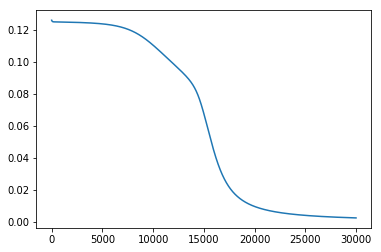

input = 
 [[0 0]
 [1 0]
 [0 1]
 [1 1]]
W1 = 
 [[-4.46971554 -5.45322427]
 [ 4.26120195  5.56011662]]
b1 = 
 [[-2.31902124  2.86950568]]
W2 = 
 [[ 7.0125629 ]
 [-6.48249313]]
b2 = 
 [[ 2.94064134]]
output value = 
 [[ 0.0713711 ]
 [ 0.92368499]
 [ 0.93038971]
 [ 0.06245336]]
prediction = 
 [[False]
 [ True]
 [ True]
 [False]]


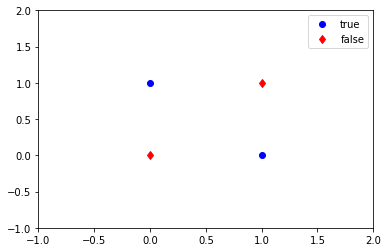

In [2]:
####################################
# initialize weight and bias
W1 = np.random.randn(2, 2) / np.sqrt(2)  # xavier initialization
b1 = np.zeros((1, 2))
W2 = np.random.randn(2, 1) / np.sqrt(2)  # xavier initialization
b2 = np.zeros((1, 1))

####################################
# training
learning_rate = 0.1
epoch = 30000
loss_hist = []

for i in range(epoch):
    
    # hidden layer (1st PERCEPTRON layer)
    #   shape = (ndata, nNode=2)
    H = sigmoid( np.dot(X, W1) + b1 )
    
    # output layer (2nd PERCEPTRON layer)
    #   shape = (ndata, nNode=1)
    Y_ = sigmoid( np.dot(H, W2) + b2 )
    
    # loss function (MSE)
    loss = ( 0.5 * (Y - Y_) ** 2 ).mean()
    loss_hist.append(loss)
    
    # backpropagation
    dLdW2 = np.dot(H.T, (Y_ - Y) * sigmoid_dot(Y_))                    # shape = (inNode=2, outNode=1)
    dLdb2 = np.sum((Y_ - Y) * sigmoid_dot(Y_), axis=0, keepdims=True)  # shape = (1, outNode=1)
    
    dLdH = np.dot((Y_ - Y) * sigmoid_dot(Y_), W2.T)                    # shape = (ndata, nNode=2)
    dLdW1 = np.dot(X.T, dLdH * sigmoid_dot(H))                         # shape = (inNode=2, outNode=2)
    dLdb1 = np.sum(dLdH * sigmoid_dot(H), axis=0, keepdims=True)       # shape = (1, outNode=2)
    
    # gradient
    nData = X.shape[0]
    gradient = np.array([dLdW1, dLdW2, dLdb1, dLdb2]) / nData
    
    # gradient descent
    W1, W2, b1, b2 = np.array([W1, W2, b1, b2]) - learning_rate * gradient
    
    
loss_plot = plt.plot(loss_hist)
plt.show(loss_plot)


####################################
# prediction test after training
H = sigmoid( np.dot(X, W1) + b1 )
Y_ = sigmoid( np.dot(H, W2) + b2 )

print('input = \n', X)
print('W1 = \n', W1)
print('b1 = \n', b1)
print('W2 = \n', W2)
print('b2 = \n', b2)
print('output value = \n', Y_)
print('prediction = \n', Y_ > 0.5)

Y_p = Y_.reshape(4) > 0.5
plt.plot(X[Y_p, 0], X[Y_p, 1], 'bo')
plt.plot(X[Y_p == False, 0], X[Y_p == False, 1], 'rd')
plt.xlim([-1, 2])
plt.ylim([-1, 2])
plt.legend(['true', 'false'])
plt.show()



### 2) 방법 2

- Activation function (hidden layer): ReLU
- Output function: Sigmoid
- Cost function: Cross Entropy
- Optimization: ADAM Optimization

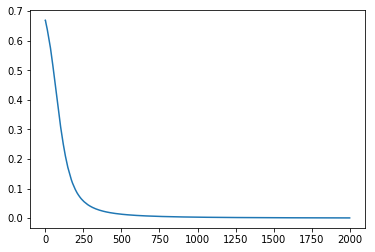

input = 
 [[0 0]
 [1 0]
 [0 1]
 [1 1]]
W1 = 
 [[ 3.15046574 -2.80259508]
 [-3.1507273   2.80218785]]
b1 = 
 [[  1.25296966e-04  -9.98077659e-05]]
W2 = 
 [[ 4.55080221]
 [ 5.15239047]]
b2 = 
 [[-6.86767282]]
output value = 
 [[ 0.00104041]
 [ 0.99943042]
 [ 0.99948446]
 [ 0.00103981]]
prediction = 
 [[False]
 [ True]
 [ True]
 [False]]


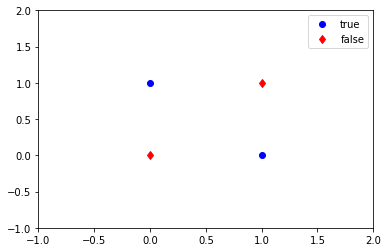

In [3]:
####################################
# initialize weight and bias
W1 = np.random.randn(2, 2) / np.sqrt(2)  # xavier initialization
b1 = np.zeros((1, 2))
W2 = np.random.randn(2, 1) / np.sqrt(2)  # xavier initialization
b2 = np.zeros((1, 1))

####################################
# training
learning_rate = 0.01
epoch = 2000
loss_hist = []

# ADAM hyper-parameters
beta1 = 0.9
beta2 = 0.999
e = 1E-8
m = np.array([np.zeros(W1.shape), np.zeros(W2.shape), np.zeros(b1.shape), np.zeros(b2.shape)])
v = np.array([np.zeros(W1.shape), np.zeros(W2.shape), np.zeros(b1.shape), np.zeros(b2.shape)])

for i in range(epoch):
    
    # hidden layer (1st PERCEPTRON layer)
    #   shape = (ndata, nNode=2)
    Hin = np.dot(X, W1) + b1
    H = relu( Hin )
    
    # output layer (2nd PERCEPTRON layer)
    #   shape = (ndata, nNode=1)
    Y_in = np.matmul(H, W2) + b2
    Y_ = sigmoid( Y_in )
    
    # loss function (Cross Entropy)
    loss = -(Y * np.log(Y_) + (1 - Y) * np.log(1 - Y_)).mean()
    loss_hist.append(loss)
    
    # backpropagation
    dLdW2 = np.dot(H.T, (Y_ - Y))                                # shape = (inNode=2, outNode=1)
    dLdb2 = np.sum((Y_ - Y), axis=0, keepdims=True)              # shape = (1, outNode=1)
    
    dLdH = np.dot((Y_ - Y), W2.T)                                # shape = (ndata, nNode=2)
    dLdW1 = np.dot(X.T, dLdH * relu_dot(Hin))                    # shape = (inNode=2, outNode=2)
    dLdb1 = np.sum(dLdH * relu_dot(Hin), axis=0, keepdims=True)  # shape = (1, outNode=2)
    
    # gradient
    nData = X.shape[0]
    gradient = np.array([dLdW1, dLdW2, dLdb1, dLdb2]) / nData
    
    #####################
    # ADAM optimization
    #  update momentum
    m = beta1 * m + (1 - beta1) * gradient
    
    #  update RMSProp
    v = beta2 * v + (1 - beta2) * gradient**2
    
    #  unbias
    t = i + 1
    m_hat = m / (1 - beta1**t)
    v_hat = v / (1 - beta2**t)
    
    #  update weights
    W1, W2, b1, b2 = np.array([W1, W2, b1, b2]) - learning_rate * m_hat / (v_hat + e)**0.5
    
    
loss_plot = plt.plot(loss_hist)
plt.show(loss_plot)


####################################
# prediction test after training
H = relu( np.dot(X, W1) + b1 )
Y_ = sigmoid( np.dot(H, W2) + b2 )

print('input = \n', X)
print('W1 = \n', W1)
print('b1 = \n', b1)
print('W2 = \n', W2)
print('b2 = \n', b2)
print('output value = \n', Y_)
print('prediction = \n', Y_ > 0.5)

Y_p = Y_.reshape(4) > 0.5
plt.plot(X[Y_p, 0], X[Y_p, 1], 'bo')
plt.plot(X[Y_p == False, 0], X[Y_p == False, 1], 'rd')
plt.xlim([-1, 2])
plt.ylim([-1, 2])
plt.legend(['true', 'false'])
plt.show()